<a href="https://colab.research.google.com/github/ackben0226/Customer-Churn-Prediction-Using-ANN-in-TensorFlow/blob/main/Saiket_System_Internship_Churn_Analysis_and_Prediction_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

def load_data():
  return pd.read_csv('/content/Telco_Customer_Churn_Dataset.csv')

data = load_data()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
def summary_data(data):
  summary = data.describe()

  print('\nData Shape')
  print(data.shape)
  print('=================================================')

  print('\nData Information')
  print(data.info())
  print('=================================================')

  print('\nMissing Values')
  print(data.isnull().sum())
  print('=================================================')

  print('\nData Types')
  print(data.dtypes)
  print('=================================================')
  print('\n')

  return summary

  print('=================================================')

summary = summary_data(data)
print(summary)


Data Shape
(7043, 21)

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

In [ ]:
for col in data.columns:
  print(col)
  print(data[col].nunique(), data[col].value_counts())
  print('--------------------------------------------')

customerID
7043 customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
--------------------------------------------
gender
2 gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------------------------------
SeniorCitizen
2 SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
--------------------------------------------
Partner
2 Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------------------------------
Dependents
2 Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------------------------------
tenure
73 tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
--------------------------------------------
PhoneService
2 PhoneService
Yes 

### __Visualization of Distribution of Some Categories__

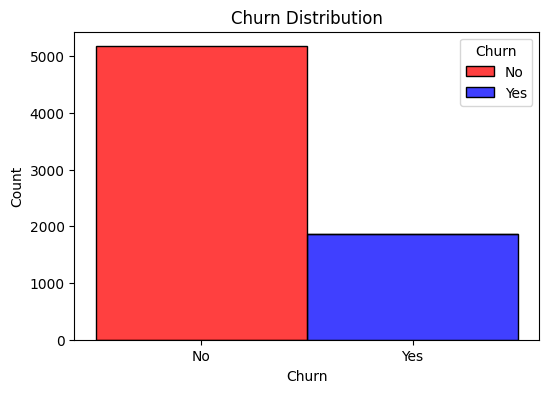

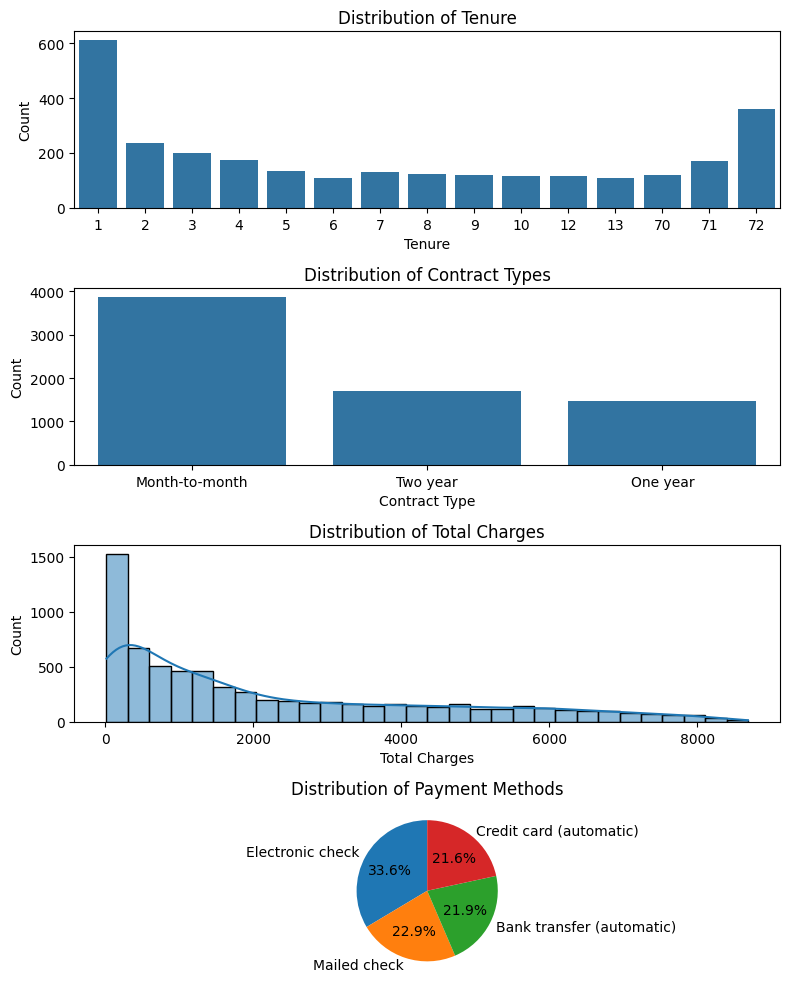

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for Churn (Separate from subplots)
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Churn', hue='Churn', multiple="stack", palette={'Yes': 'blue', 'No': 'red'})
plt.title('Churn Distribution')
plt.show()

# Create a figure with subplots (4 rows, 1 column)
fig, axes = plt.subplots(4, 1, figsize=(8, 10))

# Tenure Bar Plot (Top 15)
tenure_counts = data['tenure'].value_counts().head(15)
sns.barplot(x=tenure_counts.index, y=tenure_counts.values, ax=axes[0])
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Count')

# Contract Bar Plot
contract_counts = data['Contract'].value_counts()
sns.barplot(x=contract_counts.index, y=contract_counts.values, ax=axes[1])
axes[1].set_title('Distribution of Contract Types')
axes[1].set_xlabel('Contract Type')
axes[1].set_ylabel('Count')

# Total Charges Histogram (Fixed for Continuous Data)
if data['TotalCharges'].dtype == 'object':
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
sns.histplot(data['TotalCharges'].dropna(), bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Total Charges')
axes[2].set_xlabel('Total Charges')
axes[2].set_ylabel('Count')

# Payment Method Pie Chart
payment_counts = data['PaymentMethod'].value_counts()
payment_counts.plot(kind='pie', ax=axes[3], autopct='%1.1f%%', startangle=90)
axes[3].set_title('Distribution of Payment Methods')
axes[3].set_ylabel('')

plt.tight_layout()
plt.show()


### __Churn Analysis: Key Factors and Distribution Across Categories__

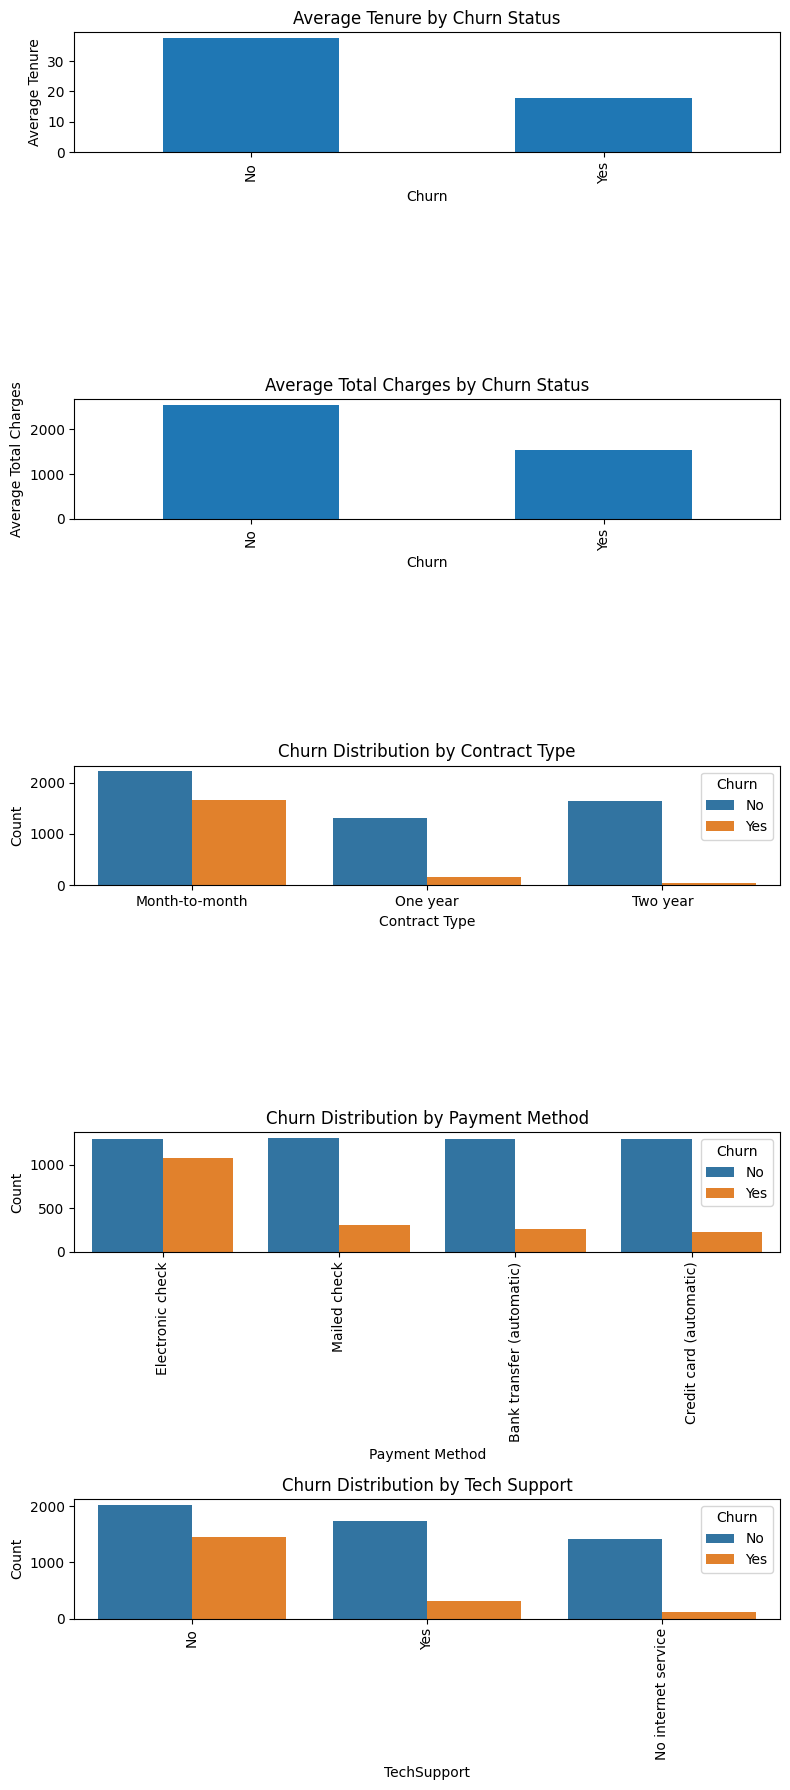

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 5 subplots
fig, axes = plt.subplots(5, 1, figsize=(8, 18))  # 4 rows, 1 column

# First subplot: Average Tenure by Churn
data.groupby('Churn')['tenure'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Average Tenure')
axes[0].set_title('Average Tenure by Churn Status')

# Second subplot: Average Total Charges by Churn
data.groupby('Churn')['TotalCharges'].mean().plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Average Total Charges')
axes[1].set_title('Average Total Charges by Churn Status')

# Third subplot: Churn Distribution by Contract Type (using Seaborn count plot)
sns.countplot(data=data, x='Contract', hue='Churn', ax=axes[2])
axes[2].set_xlabel('Contract Type')
axes[2].set_ylabel('Count')
axes[2].set_title('Churn Distribution by Contract Type')

# Fourth subplot: Churn Distribution by Payment Method (using Seaborn count plot)
sns.countplot(data=data, x='PaymentMethod', hue='Churn', ax=axes[3])
axes[3].set_xlabel('Payment Method')
axes[3].tick_params(axis='x', rotation=90)
axes[3].set_ylabel('Count')
axes[3].set_title('Churn Distribution by Payment Method')

# TechSupport
sns.countplot(data=data, x='TechSupport', hue='Churn', ax=axes[4])
axes[4].set_xlabel('TechSupport')
axes[4].tick_params(axis='x', rotation=90)
axes[4].set_ylabel('Count')
axes[4].set_title('Churn Distribution by Tech Support')

plt.tight_layout()
plt.show()


In [ ]:
print(data['TotalCharges'].value_counts().reset_index())

      TotalCharges  count
0         1397.475     11
1           20.200     11
2           19.750      9
3           20.050      8
4           19.900      8
...            ...    ...
6526      6849.400      1
6527       692.350      1
6528       130.150      1
6529      3211.900      1
6530      6844.500      1

[6531 rows x 2 columns]


In [ ]:
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### __Data Profiling__

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 88.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1bced304f63d88d1b213c28cff5d3ba00672623b93062b7992240ae67477013b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd

# Create a profile report
profile = ProfileReport(data, title="Pandas Profiling Report",
                        explorative=True,
                        html={"style": {"theme": "flatly"}})

# Save or display the report
profile.to_file("pandas_profiling_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 73.4 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
import pandas as pd

# Analyze the dataset
report = sv.analyze(data)

# Save or display the report
report.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### __Checking for Outliers__

<Axes: >

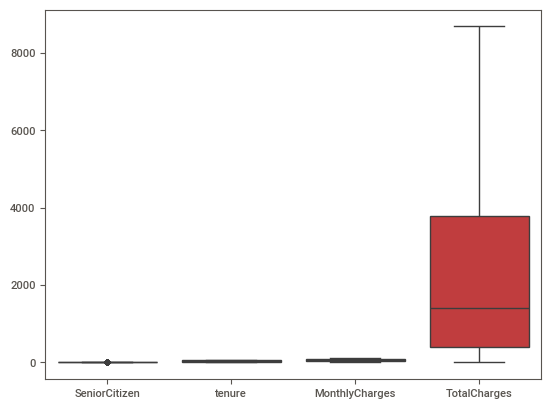

In [ ]:
import seaborn as sns

sns.boxplot(data)

### __Trimming of Outliers__

In [ ]:
numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

q1 = data['SeniorCitizen'].quantile(0.25)
q3 = data['SeniorCitizen'].quantile(0.75)

IQR = q3 - q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

data = data[
    (data['SeniorCitizen'] >= lower_bound) & (data['SeniorCitizen'] <= upper_bound)
]

In [ ]:
data.drop(columns = ['gender', 'customerID', 'MultipleLines',
                     'Partner',	'Dependents'], inplace = True)

### __Encoding of Categorical Data__

In [ ]:
from sklearn.preprocessing import LabelEncoder

string_columns = ['PhoneService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'PaperlessBilling', 'Churn']
label_encoder = LabelEncoder()

for col in string_columns:
  data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# One-hot encoding
onehot_encoded_data = pd.get_dummies(data, columns = ['InternetService', 'Contract', 'PaymentMethod'],
                                     dtype = int)
data = onehot_encoded_data

### __Scaling/Normalizing of Data__

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_columns = data.drop('Churn', axis = 1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_columns)
scaled_data = pd.DataFrame(scaled_data, columns = scaled_columns.columns)

# Include the churn
#scaled_data['Churn'] = data['Churn']
#print(scaled_data)

data = pd.concat([scaled_data, data['Churn']], axis=1)

### __Data Spliting and Data Resampling (Oversampling)__

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = data.drop(columns =['Churn']).dropna()
y = data['Churn'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('\nX_train shape:', X_train.shape)
print('\nX_test shape:', X_test.shape)
print('\ny_train shape:', y_train.shape)
print('\ny_test shape:', y_test.shape)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.astype(int), y_train.astype(int))

X_train_resampled.shape, y_train_resampled.shape


X_train shape: (4720, 22)

X_test shape: (1181, 22)

y_train shape: (4720,)

y_test shape: (1181,)


((7184, 22), (7184,))

### __ML Model, Classification Report and ROC_AUC Curve__

GBC model saved as model.pkl

Accuracy Score
0.71

Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.69      0.79       916
         1.0       0.42      0.77      0.54       265

    accuracy                           0.71      1181
   macro avg       0.67      0.73      0.67      1181
weighted avg       0.80      0.71      0.73      1181


Roc Auc Score
0.831080580044492


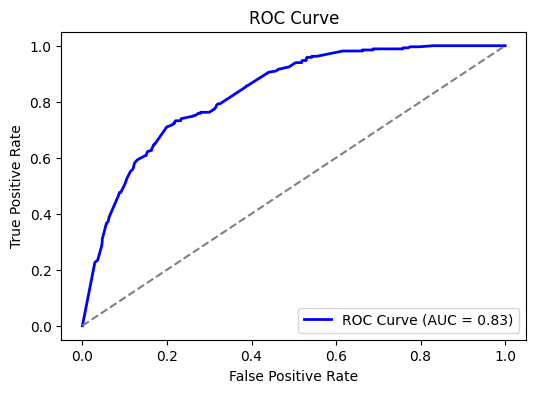

XGBoost model saved as model.pkl


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib


gbc = GradientBoostingClassifier(n_estimators = 10)

model = gbc.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

# Save the trained GBC model as 'model.pkl'
joblib.dump(model, "model.pkl")

print("GBC model saved as model.pkl")


y_pred_prob = model.predict_proba(X_test)[:, 1]

print('\nAccuracy Score')
accuracy_score = accuracy_score(y_test, y_pred)
print(round(accuracy_score, 2))

print('\nClassification Report')
report = classification_report(y_test, y_pred)
print(report)

print('\nRoc Auc Score')
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.savefig("output_plot.png")

plt.show()



# Save the trained XGBoost model as 'model.pkl'
joblib.dump(model, "model.pkl")

print("XGBoost model saved as model.pkl")

In [ ]:
data.to_csv("output.csv", index=False)
data.to_excel("output.xlsx", index=False)


In [ ]:
import matplotlib.pyplot as plt
plt.savefig("output_plot.png")


<Figure size 640x480 with 0 Axes>

In [ ]:
import joblib
import os

# Define SageMaker model directory
sagemaker_model_dir = "/opt/ml/model"
os.makedirs(sagemaker_model_dir, exist_ok=True)

# Save the trained GradientBoostingClassifier model
joblib.dump(model, os.path.join(sagemaker_model_dir, "model.joblib"))

print("Model saved successfully!")


Model saved successfully!


In [ ]:
import tarfile

tar_path = "model.tar.gz"
with tarfile.open(tar_path, "w:gz") as tar:
    tar.add(sagemaker_model_dir, arcname=".")

print(f"Model packaged as {tar_path}")

Model packaged as model.tar.gz


How to load model

In [ ]:
import joblib
import os
import json
import numpy as np

# Load the trained XGBoost model
def model_fn(model_dir):
    model_path = os.path.join(model_dir, "model.pkl")
    model = joblib.load(model_path)
    return model

# Handle input request
def input_fn(request_body, request_content_type):
    """Preprocess input data before inference"""
    if request_content_type == "application/json":
        data = json.loads(request_body)
        return np.array(data)  # Convert JSON to NumPy array
    else:
        raise ValueError(f"Unsupported content type: {request_content_type}")

# Perform inference
def predict_fn(input_data, model):
    """Make predictions using the loaded model"""
    return model.predict(input_data)

# Format output response
def output_fn(prediction, response_content_type):
    """Format the prediction output"""
    return json.dumps(prediction.tolist())

print(model.predict(input_data))

NameError: name 'input_data' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train a model (example with Random Forest)
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Save the trained model as 'model.pkl'
joblib.dump(model, "model.pkl")
print("Model saved as model.pkl")
